In [1]:
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style 
import seaborn as sns
style.use('ggplot') 
sns.set(style ="darkgrid", color_codes=True) 

In [2]:
loans_DF = pd.read_csv('./loan.csv',encoding= 'unicode_escape')

In [3]:
loans_DF.shape

(39717, 111)

# there are three types of variables
# a) Application variable - related to users eg. grade, emp_length etc these variables are needed
# b) Loan variable - relaated to loan application - these variables are needed 
# c) Loan behaviour variable - these variable not generated after the loan application and are not needed for analysis

In [4]:
loan_behaviour_variable = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
                           'total_acc','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp',
                           'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
                           'last_pymnt_amnt','last_credit_pull_d','application_type', 'pub_rec_bankruptcies', 
                           'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'initial_list_status',
                          'pymnt_plan', 'url', 'zip_code']

In [5]:
# dropping the loan behaviour variables
loans_DF = loans_DF.drop(loan_behaviour_variable, axis=1)

In [6]:
loans_DF.shape

(39717, 83)


Data Cleaning

In [7]:
# finding % of missing values in each columns of dataframe
columns_with_missing_values = 100 *(loans_DF.isnull().sum()/len(loans_DF))
print('columns with missing values: ', str(columns_with_missing_values))

columns with missing values:  id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 83, dtype: float64


In [8]:
# getting list of columns with 100% null values
colsToDrop = list(columns_with_missing_values[columns_with_missing_values==100].index)

In [9]:
# removing columns with 100% missing values
loans_DF = loans_DF.drop(colsToDrop, axis=1)

In [10]:
loans_DF.shape

(39717, 29)

In [11]:
# getting the columns with missing values
column_with_missing_values = 100*(loans_DF.isnull().sum()/len(loans_DF))
column_with_missing_values[column_with_missing_values > 0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
tax_liens                      0.098195
dtype: float64

In [12]:
# column desc is a comment column and can be removed for analysis
loans_DF = loans_DF.drop(['desc'], axis=1)

In [13]:
loans_DF.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,total_pymnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,12153.596544,0.0,1.0,0.0,0.0,0.0,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,9042.040766,0.0,0.0,0.0,0.0,0.0,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,5576.930000,0.0,1.0,0.0,0.0,0.0,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,9899.640319,0.0,1.0,0.0,0.0,0.0,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,16534.433040,0.0,1.0,0.0,0.0,0.0,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,58563.679930,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
#count of unique value in each columns
column_value_nunique = loans_DF.apply(pd.Series.nunique)

In [15]:
#list of columns having same value
column_same_value_drop = column_value_nunique[column_value_nunique == 1].index
column_same_value_drop

Index(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [16]:
#dopping column having same value
loans_DF = loans_DF.drop(column_same_value_drop, axis=1)

In [17]:
loans_DF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,total_pymnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,5863.155187
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,1008.710000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,3005.666844
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,12231.890000
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,3513.330000


In [18]:
loans_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
loan_amnt              39717 non-null int64
funded_amnt            39717 non-null int64
funded_amnt_inv        39717 non-null float64
term                   39717 non-null object
int_rate               39717 non-null object
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_title              37258 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
title                  39706 non-null object
addr_state             39717 non-null

In [19]:
#removing months from column term and creating new column (term_months)from that and 
loans_DF['term_months'] = list(loans_DF.term.str.rstrip('months').astype(int))
#dropping term
del loans_DF['term']

In [20]:
#removing '%' sign from int_rate and creating new column from that int_rate_percenatge
loans_DF['int_rate_percentage'] = list(loans_DF.int_rate.str.rstrip('%').astype(float))
#dropping int_rate
del loans_DF['int_rate']

In [21]:
#cleaning 'emp_length' column removing unnessary string data
loans_DF['emp_length'] = loans_DF.emp_length.str.rstrip('years')

loans_DF['emp_length'] = loans_DF.emp_length.replace('< 1 ','0.9')
loans_DF['emp_length'] = loans_DF.emp_length.replace('10+ ','10')
loans_DF['emp_length'] = loans_DF.emp_length.str.rstrip('+')
#converting string to float
loans_DF['emp_length'] = loans_DF['emp_length'].astype(np.float)

In [22]:
# renaming some columns to get better clarity
loans_DF = loans_DF.rename(columns={'issue_d': 'issue_date', 'annual_inc': 'annual_income'})

In [23]:
# by viewing the loans_DF.describe() output we know the annaul_inc columnn is not showing the value in correct format

# convert the salary to lakhs
loans_DF['annual_income'] = loans_DF['annual_income'].astype(np.float)
loans_DF['annual_income'] = loans_DF['annual_income']/1000

In [24]:
#creating new column for profit or loss
loans_DF['profitOrloss'] = round((loans_DF['total_pymnt'].astype(np.float)-loans_DF['funded_amnt'].astype(np.float))*100/loans_DF['funded_amnt'].astype(np.float),2)


In [25]:
# Creating a column which is ratio of funded amount and annual income
loans_DF.funded_amnt = loans_DF.funded_amnt.astype(np.float)
loans_DF['fundedAmt_income_ratio']=round(loans_DF.funded_amnt*100/loans_DF.annual_income,0)

In [26]:
# column id, member_id can be removed as they are unique column and won't be helpful in analysis
loans_DF = loans_DF.drop(['id','member_id'], axis=1)

In [27]:
loans_DF.shape

(39717, 22)

In [28]:
column_with_missing_values = 100*(loans_DF.isnull().sum()/len(loans_DF))
column_with_missing_values[column_with_missing_values > 0]

emp_title     6.191303
emp_length    2.706650
title         0.027696
dtype: float64

In [29]:
# removing row which have null values for columns emp_length, title, emp_title
# as missing rows are less than 10% so it won't impact the analysis
loans_DF = loans_DF[~loans_DF['emp_length'].isnull()]
loans_DF = loans_DF[~loans_DF['title'].isnull()]
loans_DF = loans_DF[~loans_DF['emp_title'].isnull()]


In [30]:
column_with_missing_values = 100*(loans_DF.isnull().sum()/len(loans_DF))
column_with_missing_values[column_with_missing_values > 0]

Series([], dtype: float64)

In [31]:
# calculating the credit score based on requested loan amount and funded loan amount
def getCreditScore(loan_amnt, funded_amnt):
    if loan_amnt > funded_amnt:
        return 'Low Credit Score'
    elif loan_amnt == funded_amnt:
        return 'High Credit Score'
    else:
        return ''
loans_DF['credit_score'] = loans_DF.apply(lambda row: getCreditScore(row.loan_amnt, row.funded_amnt), axis=1)


In [32]:
loans_DF['credit_score'].unique()

array(['High Credit Score', 'Low Credit Score'], dtype=object)

# we can create bins for int_rate and emp_length column

In [33]:
# since there are different interest rates so we are grouping it in to 3 categories
# int rate between 5 and 8 as low
# int rate between 9 and 15 as medium
# int rate greater than 16 as high

def int_rate_grouping(row):
    if row >= 5 and row <= 8:
        return 'Low'
    elif row > 8 and row <=15:
        return 'Medium'
    elif row > 15:
        return 'High'
    else:
        return ''

loans_DF['int_rate'] = loans_DF.int_rate_percentage.apply(lambda row: int_rate_grouping(row))

In [34]:
# we can create bins for emp_length showing whether the loan buyer is fresher, mid-level experienced, senior 
def getEmployeeExpRange(row):
    if row > 0 and row <= 2:
        return 'Fresher'
    elif row > 2 and row <= 8:
        return 'Mid-Level'
    elif row>6:
        return 'Senior'
    else:
        return ''

loans_DF['emp_length_group'] = loans_DF.emp_length.apply(lambda row: getEmployeeExpRange(row))

In [35]:
# grouping the salary of employee to bins 
def salaryBins(row):
    if row >= 4 and row <= 200:
        return 'Low'
    elif row > 200 and row <= 2000:
        return 'Medium'
    elif row > 2000:
        return 'High'
    else:
        return ''


loans_DF['annual_income_grouping'] = loans_DF.annual_income.apply(lambda row: salaryBins(row))

In [36]:
# dti is important column it is debt to income ratio
# a high DTI ratio can signal that an individual has too much debt for the amount of income earned each month.
# dti < 15 is low DTI ratio
def getDTICat(row):
    if row <=15:
        return 'Low'
    else:
        return 'High'

loans_DF['dti_Cat'] = loans_DF.dti.apply(lambda row: getDTICat(row))

In [37]:
loans_DF['dti_Cat'].unique()

array(['Low', 'High'], dtype=object)

In [38]:
loans_DF['emp_length'].unique()

array([ 0.9, 10. ,  1. ,  3. ,  8. ,  9. ,  5. ,  4. ,  6. ,  2. ,  7. ])

In [39]:
loans_DF['int_rate'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [40]:
loans_DF['annual_income'].unique()

array([30.   , 49.2  , 80.   , ..., 33.99 , 36.153, 27.376])

In [41]:
# Since loan_status is our target variable and we are interested in Charged Off and Fully Paid rows
# so removing the rows with value Current
loans_DF = loans_DF[loans_DF['loan_status'] != 'Current']

In [42]:
# converting the required columns to date 
loans_DF['issue_date'] = pd.to_datetime(loans_DF.issue_date, format='%b-%y')

In [43]:
loans_DF['loan_issued_year'] = loans_DF['issue_date'].apply(lambda row: row.year)

In [44]:
loans_DF['loan_issued_year'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

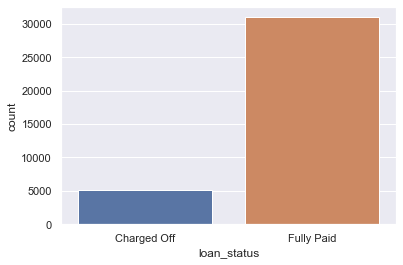

In [45]:
# number of loans fully paid  or charged off
sns.countplot(x= loans_DF["loan_status"])
plt.show()

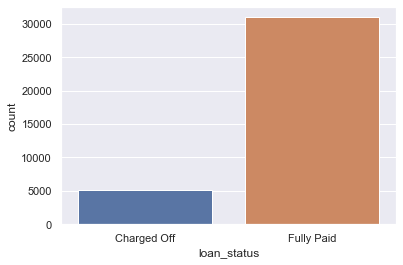

In [46]:
# number of loans fully paid  or charged off
sns.countplot(x= loans_DF["loan_status"])
plt.show()

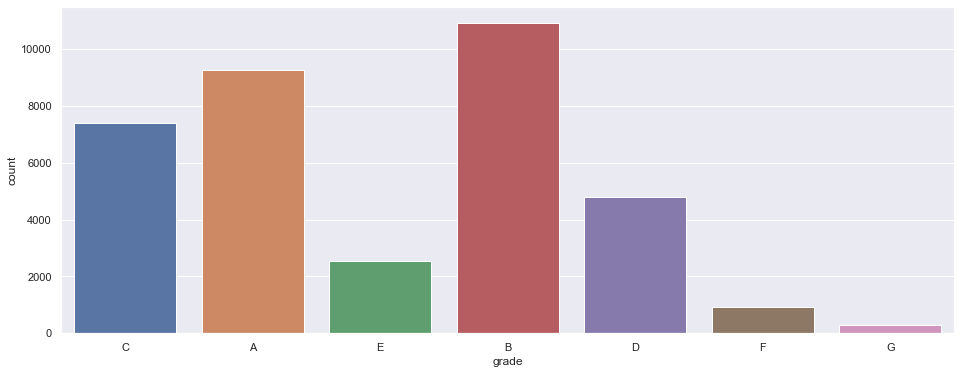

In [47]:
# graph shwoing number of loans takers grade wise
plt.figure(figsize=(16, 6))
sns.countplot(x=loans_DF["grade"])
plt.show()

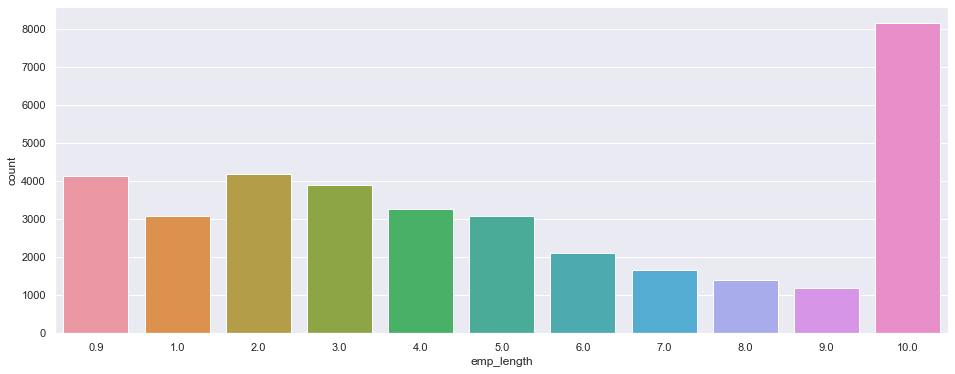

In [48]:
# number of loans employee experience wise
plt.figure(figsize=(16, 6))
sns.countplot(x=loans_DF['emp_length'])
plt.show()

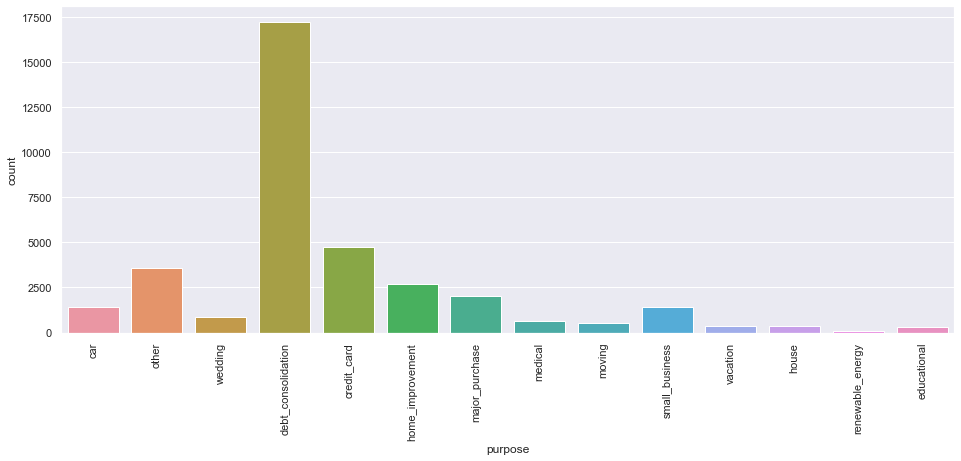

In [49]:
#countplot of purpose of loan
plt.figure(figsize=(16, 6))
ax = sns.countplot(x= loans_DF["purpose"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
plt.show()

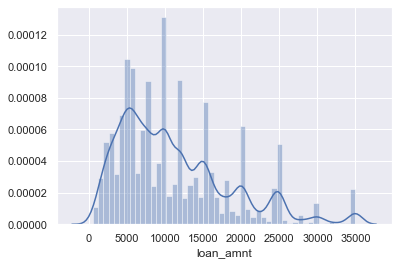

In [50]:
#distplot for loan_amount
sns.distplot(loans_DF['loan_amnt'])
plt.show()

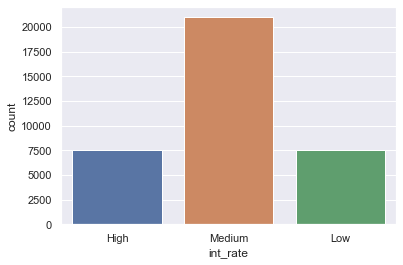

In [51]:
# int_rate grouping
sns.countplot(x= loans_DF["int_rate"])
plt.show()

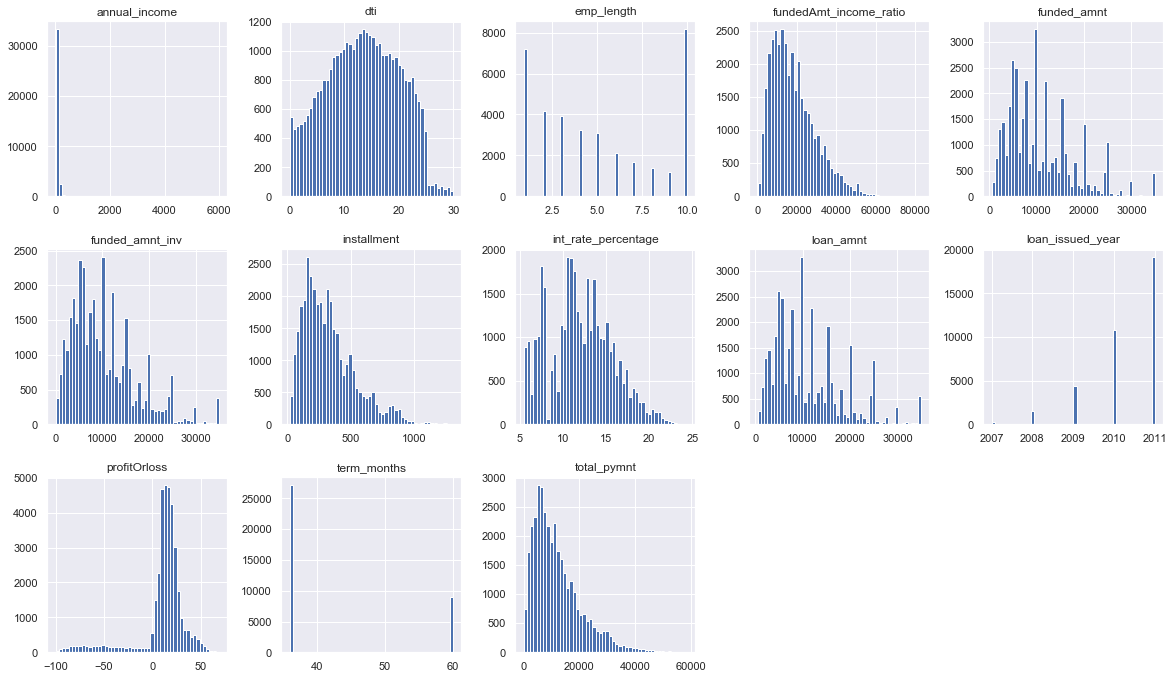

In [52]:
#hitogram of all the int and float column
loans_DF.hist(bins=50,figsize=(20,20), layout=(5,5));

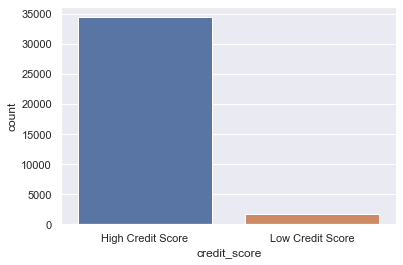

In [53]:
# number of people with low credit score and high credit score
sns.countplot(x= loans_DF["credit_score"])
plt.show()

Univarite Analysis

In [54]:
defaultersData = loans_DF[loans_DF['loan_status']=='Charged Off']

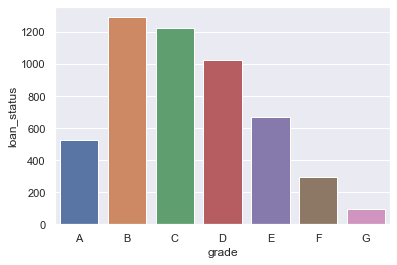

In [55]:
# number of defaulters grade wise
gradeGrp = defaultersData.groupby('grade')['loan_status'].count().reset_index()
sns.barplot(x='grade', y='loan_status', data=gradeGrp)

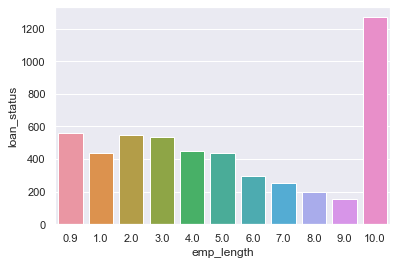

In [56]:
# defaulters with respect to employee experience
empExpGrp = defaultersData.groupby('emp_length')['loan_status'].count().reset_index()
sns.barplot(x='emp_length', y='loan_status', data=empExpGrp)

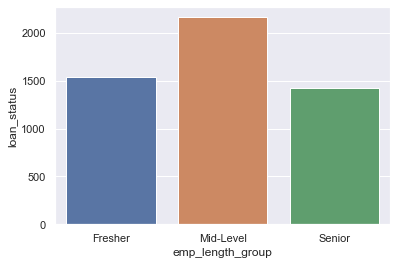

In [57]:
# defaulters with respect to employee experience
empExpGrp = defaultersData.groupby('emp_length_group')['loan_status'].count().reset_index()
sns.barplot(x='emp_length_group', y='loan_status', data=empExpGrp)

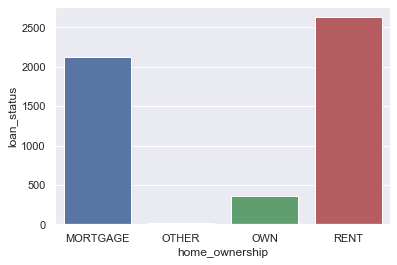

In [58]:
# defaulters with respect to home_ownership
homeOwnershipGrp = defaultersData.groupby('home_ownership')['loan_status'].count().reset_index()
sns.barplot(x='home_ownership', y='loan_status', data=homeOwnershipGrp)

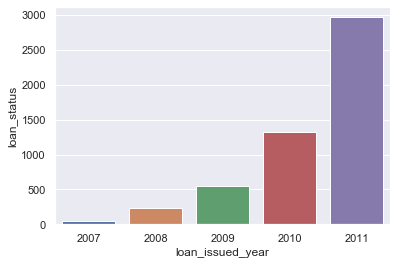

In [59]:
# defaulters with respect to loan_issued_year
loanIssuedYearGrp = defaultersData.groupby('loan_issued_year')['loan_status'].count().reset_index()
sns.barplot(x='loan_issued_year', y='loan_status', data=loanIssuedYearGrp)

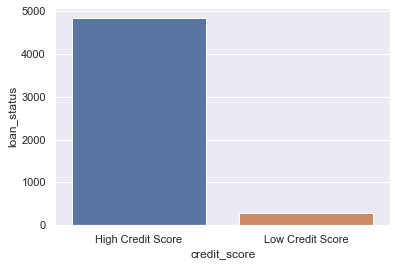

In [60]:
# defaulters with respect to credit_score
creditScoreGrp = defaultersData.groupby('credit_score')['loan_status'].count().reset_index()
sns.barplot(x='credit_score', y='loan_status', data=creditScoreGrp)

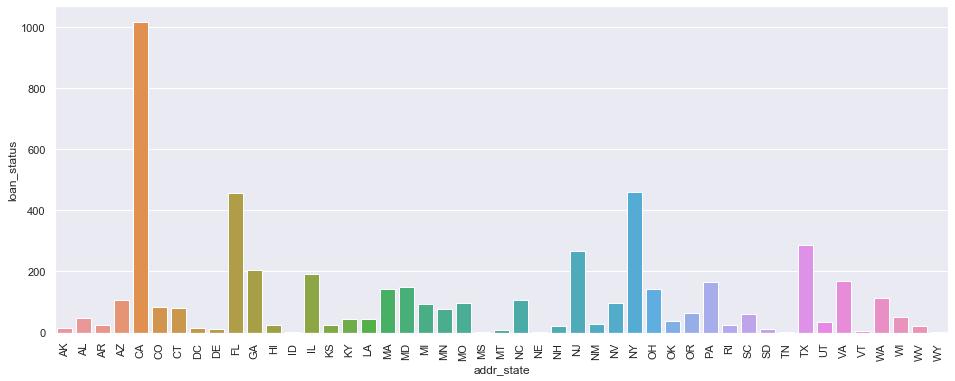

In [61]:
# defaulters with respect to address
addrStateGrp = defaultersData.groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='addr_state', y='loan_status', data=addrStateGrp)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

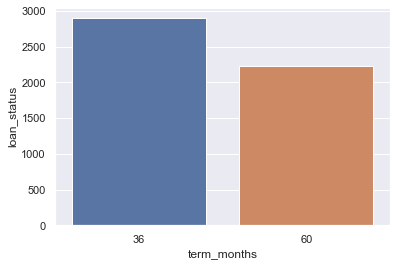

In [62]:
# defaulters with respect to loan term
termGrp = defaultersData.groupby('term_months')['loan_status'].count().reset_index()
sns.barplot(x='term_months', y='loan_status', data=termGrp)


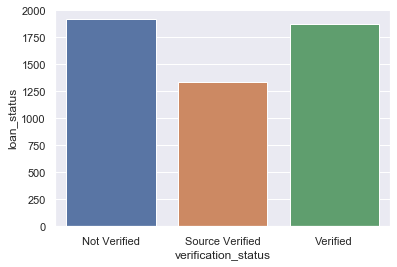

In [63]:
# defaulters with respect to loan verification status 
verificationStatusGrp = defaultersData.groupby('verification_status')['loan_status'].count().reset_index()
sns.barplot(x='verification_status', y='loan_status', data=verificationStatusGrp)

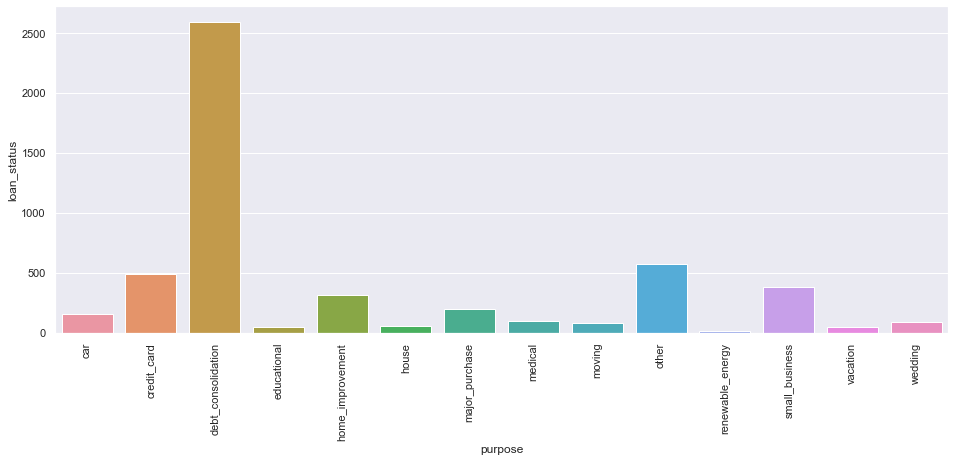

In [64]:
# defaulters with respect to purpose 
purposeGrp = defaultersData.groupby('purpose')['loan_status'].count().reset_index()
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='purpose', y='loan_status', data=purposeGrp)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

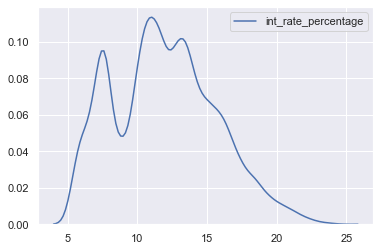

In [65]:
#kdeplot of purpose of loan
sns.kdeplot(loans_DF['int_rate_percentage']);
plt.show()

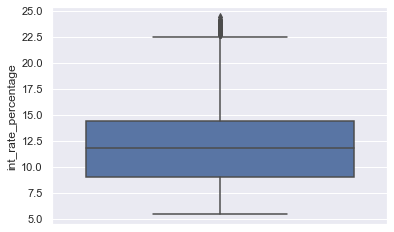

In [66]:
#boxplot for int_rate_percentage
sns.boxplot(y=loans_DF['int_rate_percentage'])
plt.show()

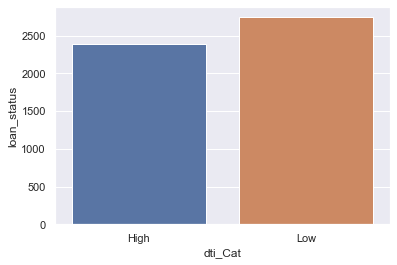

In [67]:
# defaulters with respect to dti_Cat 
dtiCatGrp = defaultersData.groupby('dti_Cat')['loan_status'].count().reset_index()
sns.barplot(x='dti_Cat', y='loan_status', data=dtiCatGrp)

## Bivariate Anaylsis

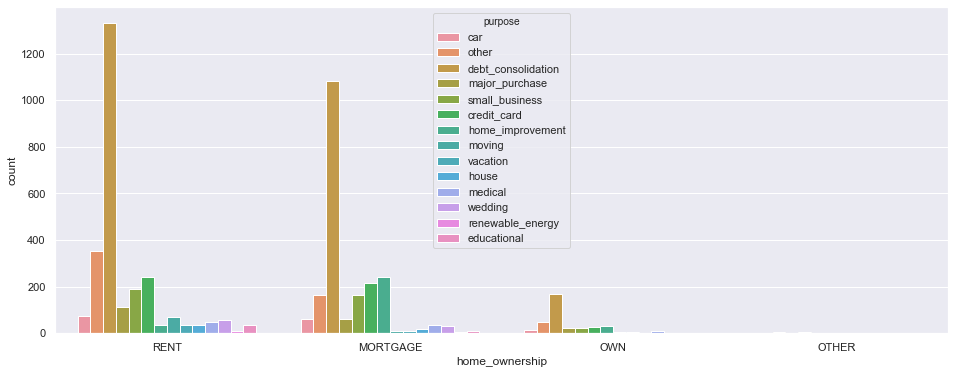

In [68]:
#relationship b/w home_ownership and purpose
plt.figure(figsize=(16, 6))
sns.countplot(x='home_ownership',hue='purpose',data=defaultersData)
plt.show()

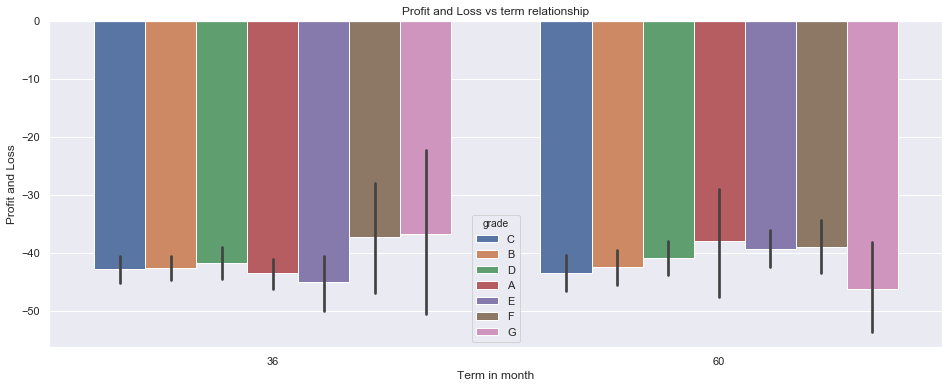

In [69]:
#Profit/ Loss vs term_months relationship
plt.figure(figsize=(16, 6))
sns.barplot(x='term_months',y='profitOrloss',data=defaultersData,hue='grade')
plt.xlabel("Term in month")
plt.ylabel("Profit and Loss")

plt.title("Profit and Loss vs term relationship")
plt.show()

In [70]:
# getting the correlation for the loans_DF using heatmap
loans_DF.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_income,dti,total_pymnt,term_months,int_rate_percentage,profitOrloss,fundedAmt_income_ratio,loan_issued_year
loan_amnt,1.000000,0.981616,0.936253,0.931315,0.144294,0.255534,0.063913,0.882366,0.348077,0.298710,0.038895,0.588828,0.113776
funded_amnt,0.981616,1.000000,0.954657,0.957232,0.144145,0.251019,0.063928,0.899207,0.326727,0.303110,0.040293,0.608028,0.125335
funded_amnt_inv,0.936253,0.954657,1.000000,0.902553,0.153691,0.238435,0.072957,0.874509,0.346876,0.295721,0.065781,0.576785,0.259499
installment,0.931315,0.957232,0.902553,1.000000,0.117702,0.252457,0.054193,0.858210,0.089714,0.274581,0.033165,0.568986,0.056664
emp_length,0.144294,0.144145,0.153691,0.117702,1.000000,0.108414,0.047046,0.127207,0.102302,0.000456,0.000538,-0.007016,0.100776
annual_income,0.255534,0.251019,0.238435,0.252457,0.108414,1.000000,-0.120822,0.243632,0.045001,0.045580,0.047946,-0.236135,0.012383
dti,0.063913,0.063928,0.072957,0.054193,0.047046,-0.120822,1.000000,0.060650,0.077107,0.114579,0.007036,0.145683,0.091526
total_pymnt,0.882366,0.899207,0.874509,0.858210,0.127207,0.243632,0.060650,1.000000,0.308300,0.291010,0.404293,0.517023,0.117677
term_months,0.348077,0.326727,0.346876,0.089714,0.102302,0.045001,0.077107,0.308300,1.000000,0.441584,0.056067,0.254866,0.240944
int_rate_percentage,0.298710,0.303110,0.295721,0.274581,0.000456,0.045580,0.114579,0.291010,0.441584,1.000000,0.067516,0.214263,0.043094


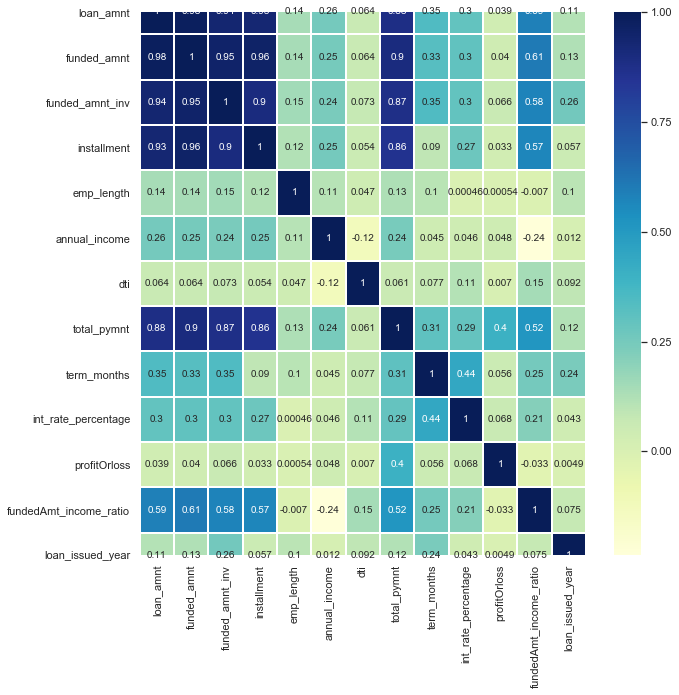

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(loans_DF.corr(),annot=True,cmap="YlGnBu",linewidths=1)
plt.show()

In [72]:
loans_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36127 entries, 1 to 39716
Data columns (total 28 columns):
loan_amnt                 36127 non-null int64
funded_amnt               36127 non-null float64
funded_amnt_inv           36127 non-null float64
installment               36127 non-null float64
grade                     36127 non-null object
sub_grade                 36127 non-null object
emp_title                 36127 non-null object
emp_length                36127 non-null float64
home_ownership            36127 non-null object
annual_income             36127 non-null float64
verification_status       36127 non-null object
issue_date                36127 non-null datetime64[ns]
loan_status               36127 non-null object
purpose                   36127 non-null object
title                     36127 non-null object
addr_state                36127 non-null object
dti                       36127 non-null float64
total_pymnt               36127 non-null float64
term_months  

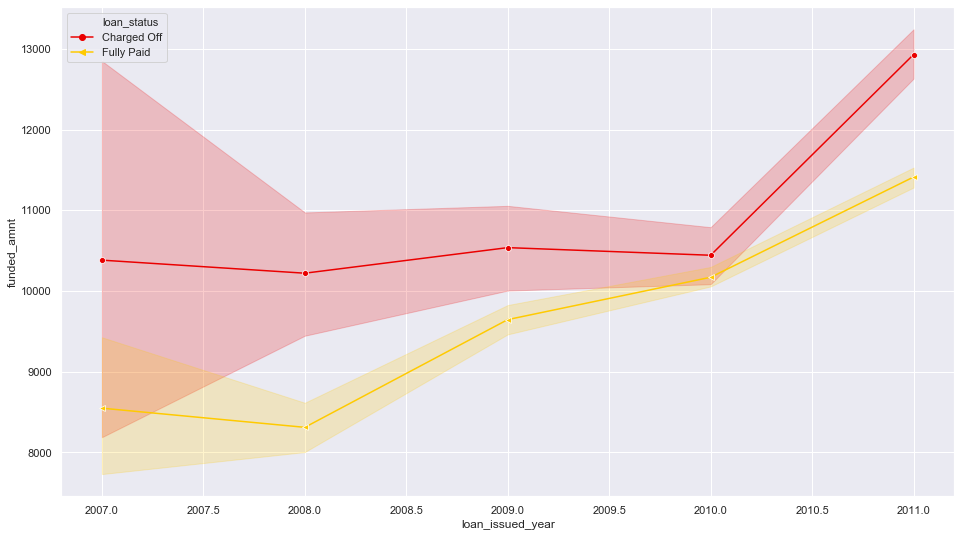

In [73]:
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
 
sns.lineplot(x = "loan_issued_year", y = "funded_amnt", data = loans_DF, hue = "loan_status",
            style = "loan_status", palette = "hot", dashes = False, 
            markers = ["o", "<"],  legend="brief",)
 

plt.show()

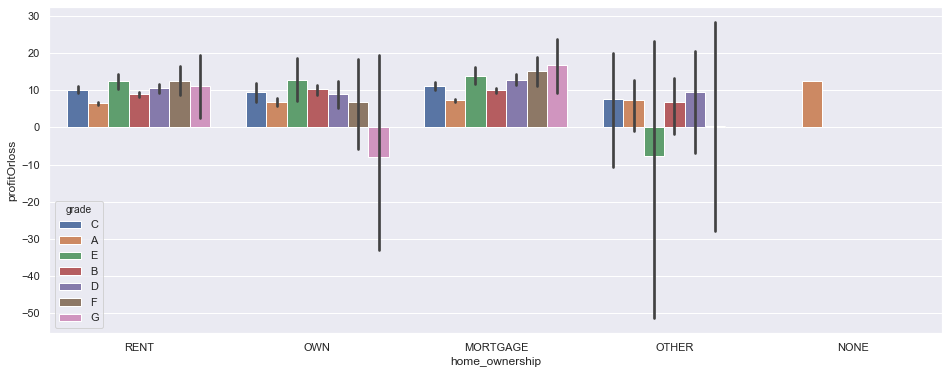

In [74]:
#Profit/ Loss vs Home Ownership relationship with grade
plt.figure(figsize=(16, 6))
sns.barplot(x='home_ownership',y='profitOrloss',data=loans_DF,hue='grade')

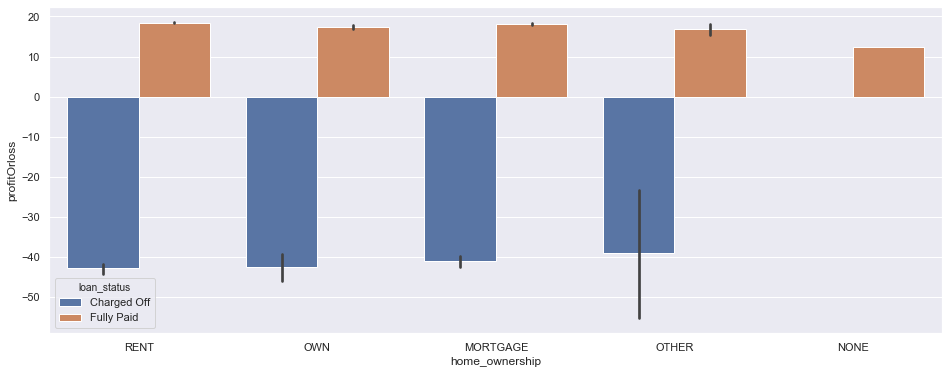

In [75]:
#Profit/ Loss vs Home Ownership relationship with loan_status
plt.figure(figsize=(16, 6))
sns.barplot(x='home_ownership',y='profitOrloss',data=loans_DF,hue='loan_status')

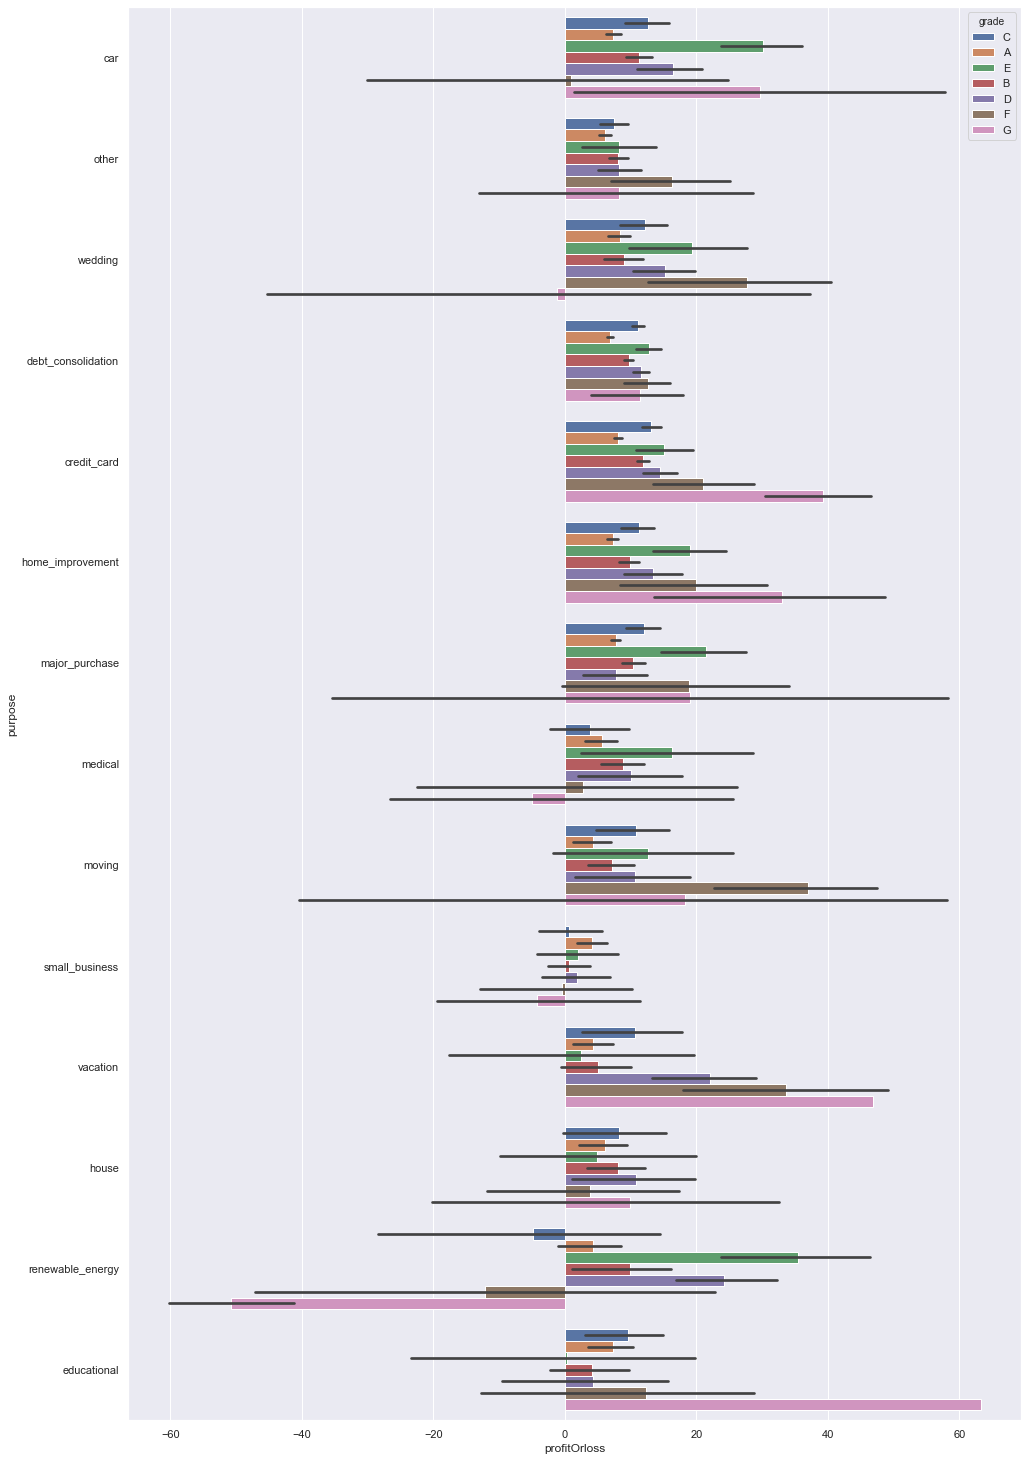

In [76]:
#Profit/ Loss vs purpose relationship with grade
plt.figure(figsize=(16, 26))
sns.barplot(x='profitOrloss',y='purpose',data=loans_DF,hue='grade')

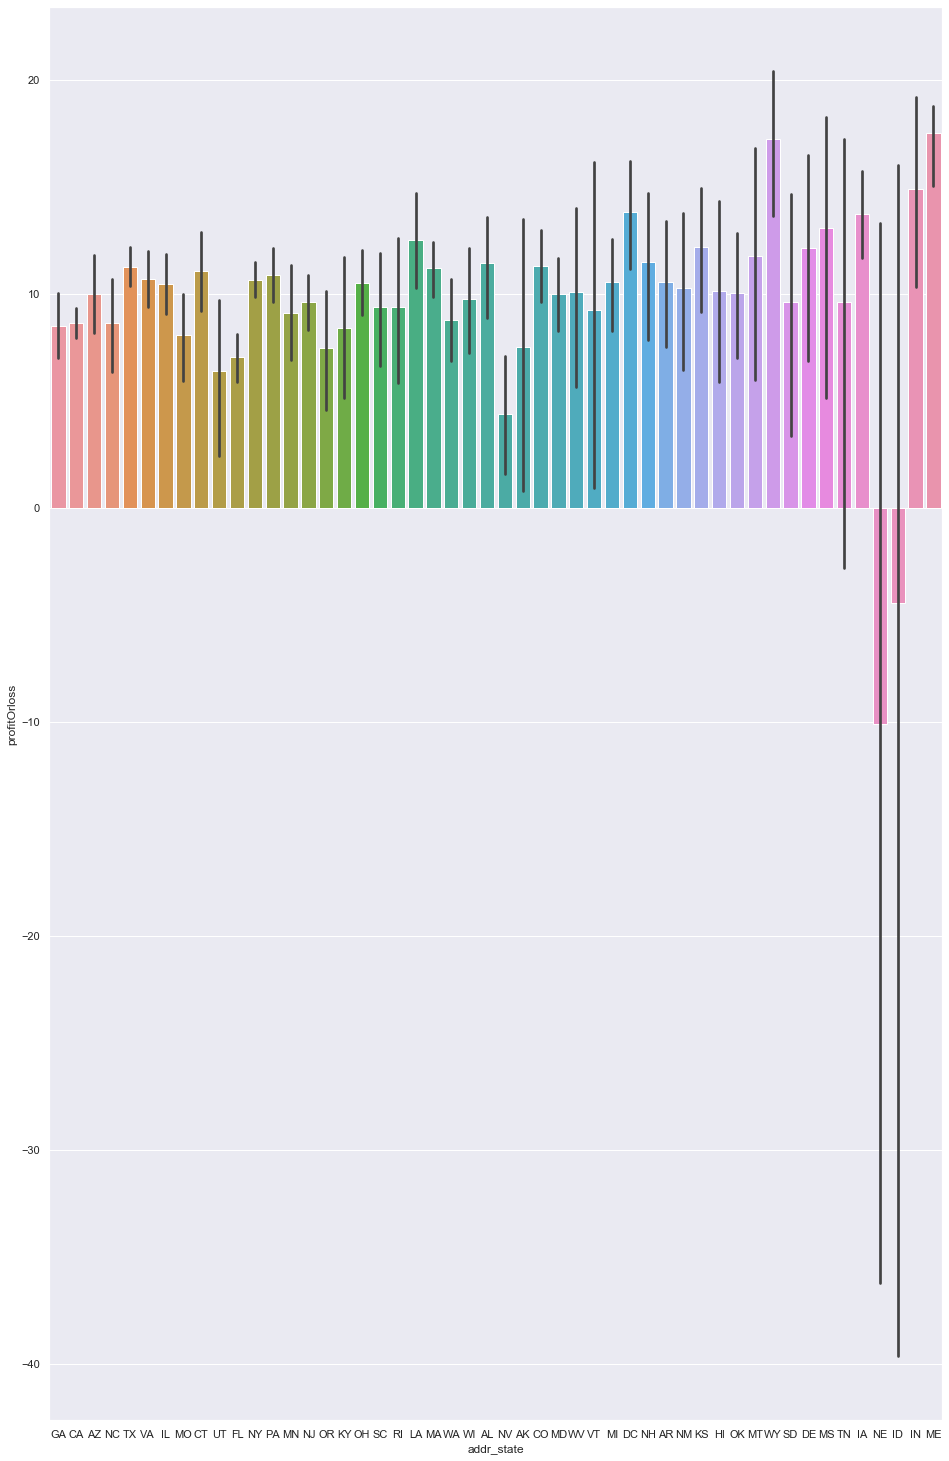

In [77]:
#Profit/ Loss vs address state relationship
plt.figure(figsize=(16, 26))
sns.barplot(x='addr_state',y='profitOrloss',data=loans_DF)

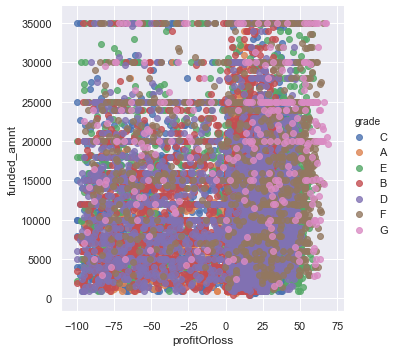

In [78]:
# a 2D scatterplot for profit/loss with funded amount
sns.lmplot( x="profitOrloss", y="funded_amnt", data=loans_DF, fit_reg=False, hue='grade')

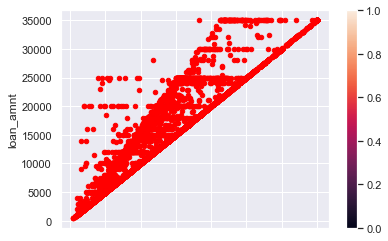

In [79]:
loans_DF.plot.scatter(x='funded_amnt',y='loan_amnt', color=['red'],colormap='viridis')

In [ ]:
#a grid of plots for each variable in your dataset.
sns.pairplot(loans_DF)